In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.formula.api import ols  

In [ ]:
#CREATING simple linear regression model Delivery_time -> Predict delivery time using sorting time

In [30]:
data=pd.read_csv("delivery_time.csv")
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [32]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [33]:
data.rename({"Delivery Time":"Delivery_Time"},axis=1,inplace=True)
data.rename({"Sorting Time":"Sorting_Time"},axis=1,inplace=True)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


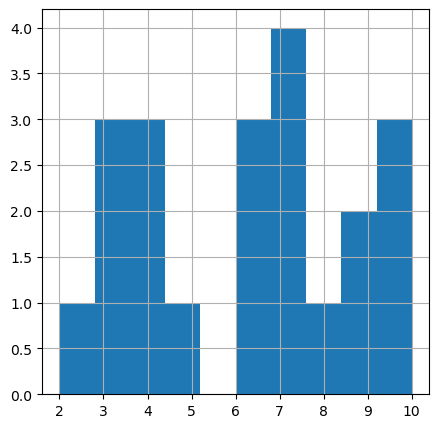

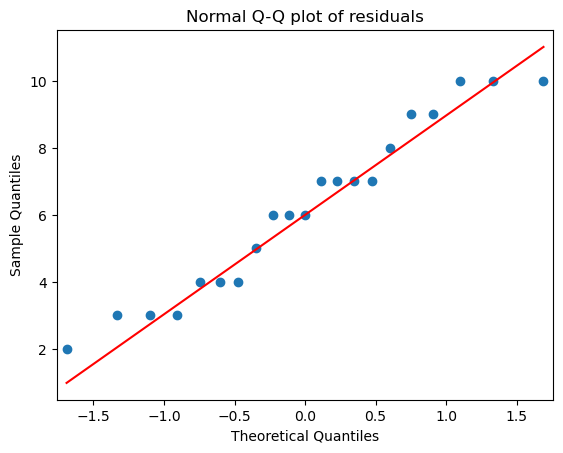

In [34]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data["Sorting_Time"].hist()
qqplot=sm.qqplot(data["Sorting_Time"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

LOGARTHMIC TRANSFORMATION

In [35]:
import numpy as np
data['SortingTime_log']=np.log(data['Sorting_Time'])

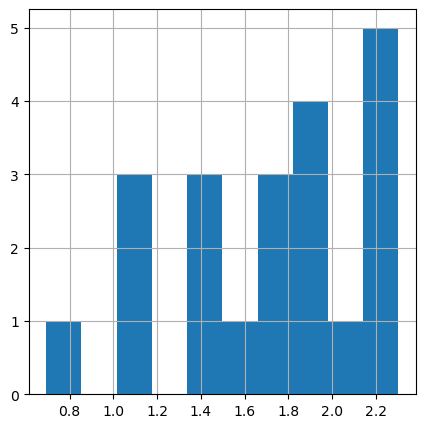

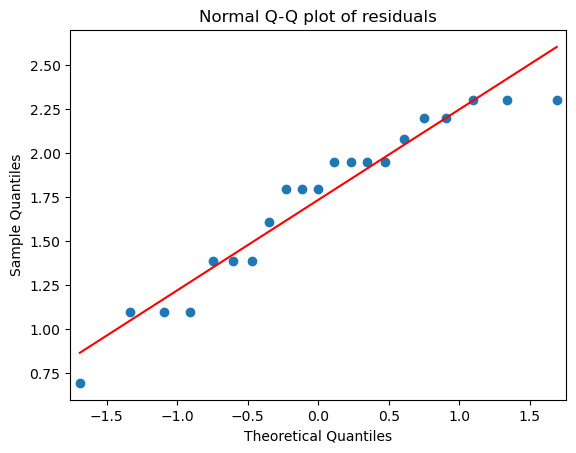

In [36]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data["SortingTime_log"].hist()
qqplot=sm.qqplot(data["SortingTime_log"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

RECIPROCAL TRANSFORMATION

In [39]:
data['SortingTime_reci']=1/data.Sorting_Time

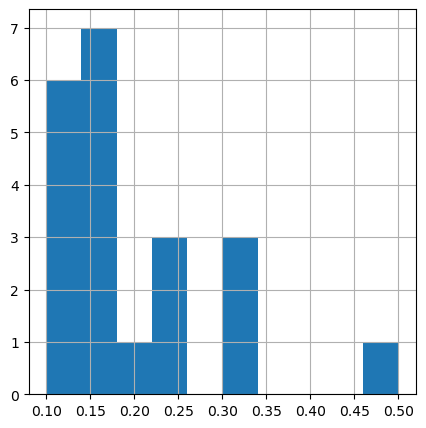

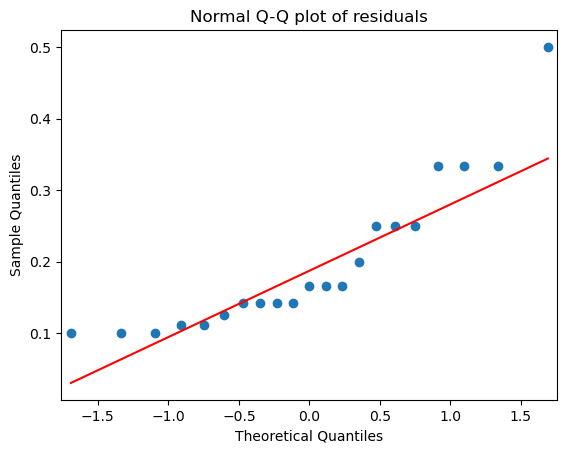

In [41]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data["SortingTime_reci"].hist()
qqplot=sm.qqplot(data["SortingTime_reci"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

SQUARE ROOT TRANSFORMATION

In [44]:
data['SortingTime_square']=data.Sorting_Time**(1/2)

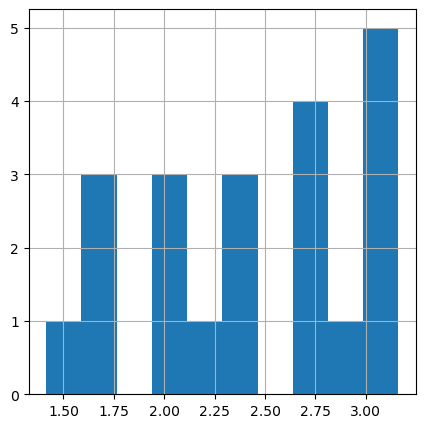

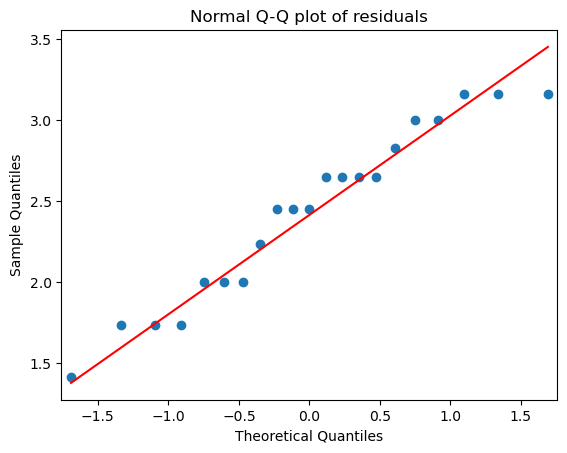

In [46]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data["SortingTime_square"].hist()
qqplot=sm.qqplot(data["SortingTime_square"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

EXPONENTIAL TRANSFORMATION

In [49]:
data['SortingTime_exp']=data.Sorting_Time**(1/1.2)

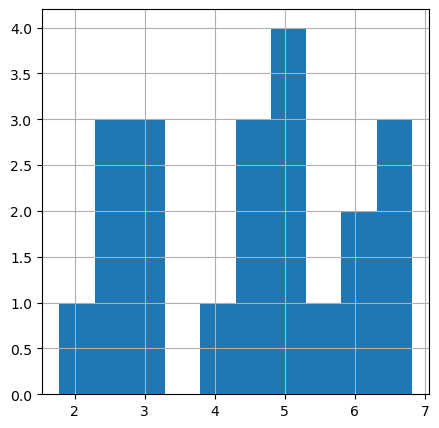

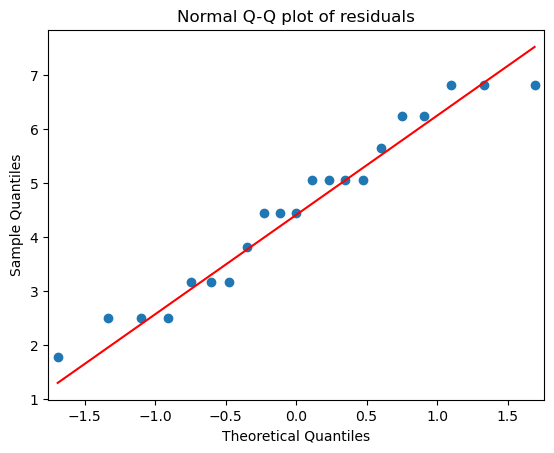

In [51]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data["SortingTime_exp"].hist()
qqplot=sm.qqplot(data["SortingTime_exp"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [111]:
model5=ols("Delivery_Time~Sorting_Time",data=data).fit()
sortingtimer2=model5.rsquared
sortingtimer2


0.6822714748417231

In [107]:
model6=ols("Delivery_Time~SortingTime_log",data=data).fit()
sortingtimelogr2=model6.rsquared
sortingtimelogr2

0.6954434611324223

In [108]:
model7=ols("Delivery_Time~SortingTime_reci",data=data).fit()
sortingtimerecir2=model7.rsquared
sortingtimerecir2

0.6433341704115106

In [109]:
model8=ols("Delivery_Time~SortingTime_square",data=data).fit()
sortingtimesqrtr2=model8.rsquared
sortingtimesqrtr2

0.6958062276308671

In [110]:
model9=ols("Delivery_Time~SortingTime_exp",data=data).fit()
sortingtimeexpr2=model9.rsquared
sortingtimeexpr2

0.688075646804559

In [112]:
rsquarevalue=pd.DataFrame({"transformtions":["rawdata","log_transform","reciprocal_transform","sqrt_transform","exp_transform"],"r2values":[sortingtimer2,sortingtimelogr2,sortingtimerecir2,sortingtimesqrtr2,sortingtimeexpr2]})
rsquarevalue

,transformtions,r2values
0,rawdata,0.682271
1,log_transform,0.695443
2,reciprocal_transform,0.643334
3,sqrt_transform,0.695806
4,exp_transform,0.688076


# CHOSSING squareroot transformation data as it has highest rsquare value

In [126]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.61e-06
Time:                        19:57:04   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5188      2.995     -0.841      0.411      -8.788       3.751
SortingTime_square     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
sample=pd.Series([10,4,6])
prediction=pd.DataFrame(sample,columns=["Sorting_Time"])
prediction["SortingTime_square"]=prediction.Sorting_Time**(1/2)
prediction

,Sorting_Time,SortingTime_square
0,10,3.162278
1,4,2.000000
2,6,2.449490


In [125]:
model8.predict(prediction.SortingTime_square)

0    22.578867
1    13.354345
2    16.921761
dtype: float64

# CREATING simple linear regression model Salary_hike -> Build a prediction model for Salary_hike

In [73]:
data2=pd.read_csv("Salary_Data.csv")
data2.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [74]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


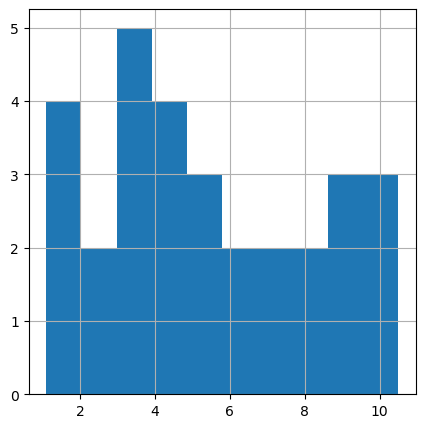

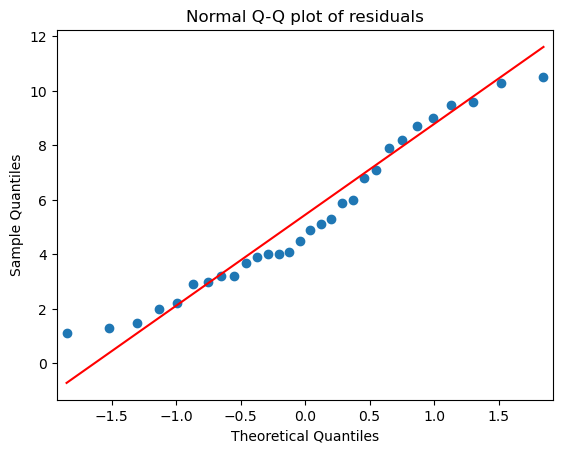

In [85]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data2["YearsExperience"].hist()
qqplot=sm.qqplot(data2["YearsExperience"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [83]:
model2=ols("Salary~YearsExperience",data=data2).fit()
YearsExperience_r2=model2.rsquared
YearsExperience_r2

0.9569566641435086

logarthmic transformation

In [88]:
import numpy as np
data2['YearsExperience_log']=np.log(data2['YearsExperience'])


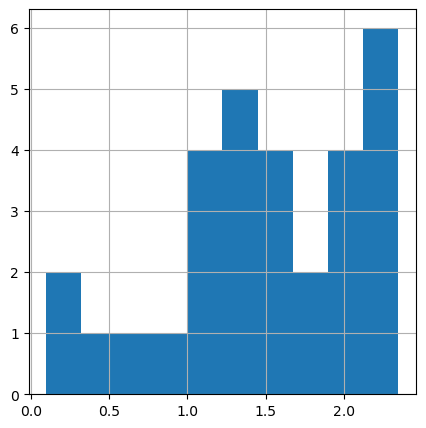

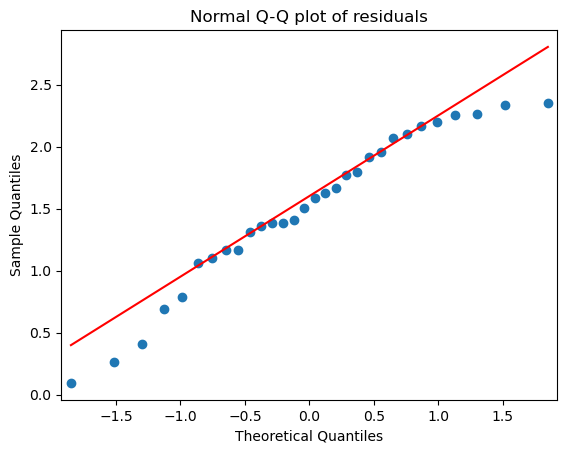

In [89]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data2["YearsExperience_log"].hist()
qqplot=sm.qqplot(data2["YearsExperience_log"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [90]:
model3=ols("Salary~YearsExperience_log",data=data2).fit()
YearsExperiencelog_r2=model3.rsquared
YearsExperiencelog_r2

0.8538888828756969

square root transformation

In [91]:
data2['YearsExperience_square']=data2.YearsExperience**(1/2)

,YearsExperience,Salary,YearsExperience_log,YearsExperience_square
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240
5,2.9,56642.0,1.064711,1.702939
6,3.0,60150.0,1.098612,1.732051
7,3.2,54445.0,1.163151,1.788854
8,3.2,64445.0,1.163151,1.788854
9,3.7,57189.0,1.308333,1.923538


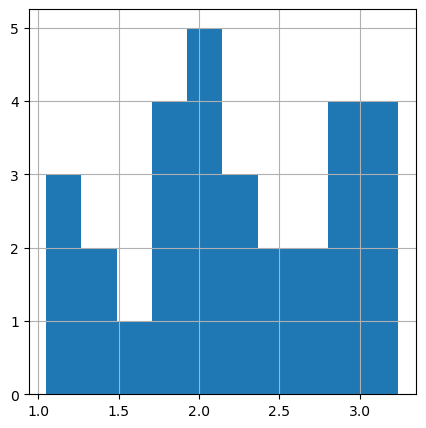

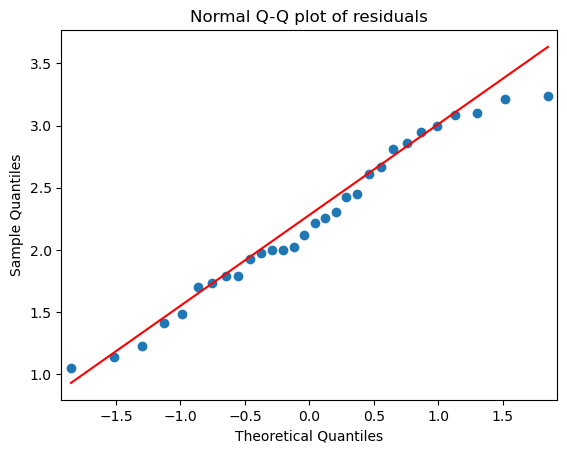

In [92]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data2["YearsExperience_square"].hist()
qqplot=sm.qqplot(data2["YearsExperience_square"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [93]:
model4=ols("Salary~YearsExperience_square",data=data2).fit()
YearsExperiencesquare_r2=model4.rsquared
YearsExperiencesquare_r2

0.9310009544993526

exponential transformation

In [96]:
data2['YearsExperience_exp']=data2.YearsExperience**(1/1.2)


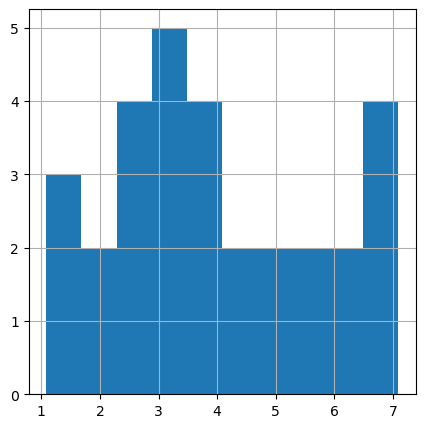

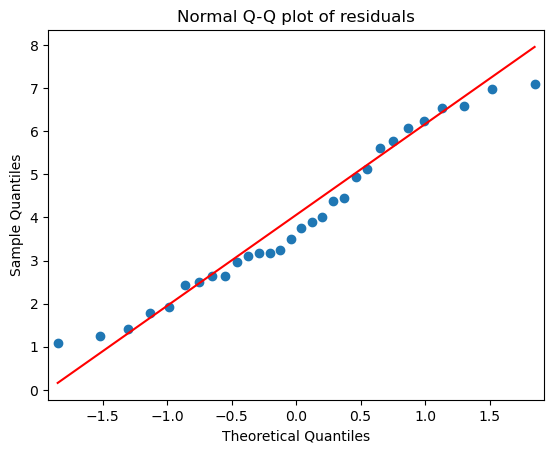

In [97]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
data2["YearsExperience_exp"].hist()
qqplot=sm.qqplot(data2["YearsExperience_exp"],line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [98]:
model5=ols("Salary~YearsExperience_exp",data=data2).fit()
YearsExperienceexp_r2=model5.rsquared
YearsExperienceexp_r2

0.9532886966176904

RSQUARE VALUES

In [99]:
rsquarevalues=pd.DataFrame({"transformtions":["rawdata","log_transform","sqrt_transform","exp_transform"],"r2values":[YearsExperience_r2,YearsExperiencelog_r2,YearsExperiencesquare_r2,YearsExperienceexp_r2]})
rsquarevalues

,transformtions,r2values
0,rawdata,0.956957
1,log_transform,0.853889
2,sqrt_transform,0.931001
3,exp_transform,0.953289


# CHOSSING RAW INDEPENDENT VARIABLE DATA WITHOUT ANY TRANSFORMATIONS AS IT GIVES THE HIGHEST RSQUARE VALUE

In [100]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        19:30:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#predicting some dependent variable values 
df=pd.Series([2.5,5])
pred=pd.DataFrame(df,columns=["YearsExperience"])
pred

,YearsExperience
0,2.5
1,5.0


In [102]:
model2.predict(pred)

0    49417.106002
1    73042.011806
dtype: float64